In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. To merge the 12 csv files into one

In [5]:
csv_folder = r"C:\Users\Mr_Life\Desktop\Data Thinkers\Slaes_Prediction\Sales_Data"
csv_files = [os.path.join(csv_folder, file) for file in 
os.listdir(csv_folder) if file.endswith('.csv')]

combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=False)

In [6]:
# save the combined csv into an empty column

In [7]:
combined_df.to_csv("Merged_dataset.csv", index=False)

In [8]:
# Reload the data 

In [9]:
data = pd.read_csv("Merged_dataset.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# 2. Carryout Some Exploratory data analysis(EDA)

In [10]:
data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [11]:
data.shape

(186850, 6)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [13]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# 3. As you can see in the above data there are missing values.So we are going to calculate the percentage of missing data in the dataset so as to determine the best method to handle the missing values.

In [15]:
percentage_of_Null = data.isnull().sum()*100/len(data)

In [16]:
percentage_of_Null

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

# 4. Since this is Sales Analysis The NaN show or indicates days that there where no sales so we are going to dropNaN

In [17]:
data = data.rename(columns={"Price Each" : "Price_Each", "Order ID" : "Order_ID", "Quantity Ordered" : "Quantity_Ordered", "Order Date":"Order_Date"})

In [18]:
data['Quantity_Ordered'] = pd.to_numeric(data['Quantity_Ordered'], errors='coerce')
data['Price_Each'] = pd.to_numeric(data['Price_Each'], errors='coerce')
data['Order_ID'] = pd.to_numeric(data['Order_ID'], errors='coerce')

In [19]:
data.dropna(inplace=True)

In [20]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [21]:
data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase Address    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity_Ordered  185950 non-null  float64
 3   Price_Each        185950 non-null  float64
 4   Order_Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(3), object(3)
memory usage: 9.9+ MB


# 5. Let Use create "MONTH" column

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# convert object dtype to datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce')
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%m/%d/%y %H:%M')

In [25]:
data['MONTH'] = data['Order_Date'].dt.month

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  float64       
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  float64       
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   MONTH             185950 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(2)
memory usage: 10.6+ MB


In [27]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address,MONTH
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


# 6. As you can see above i have successed in correcting all the missing data in our data set so now lets proceed by answering so of the questions 
# Questiion 1: what was the best month for sales? How much was earned that month?

## lets create sales column

In [28]:
data["Sales"] = data["Quantity_Ordered"]*data["Price_Each"]

In [29]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address,MONTH,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  float64       
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  float64       
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   MONTH             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(2)
memory usage: 12.1+ MB


In [31]:
data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase Address    0
MONTH               0
Sales               0
dtype: int64

In [32]:
data.groupby('MONTH').sum(numeric_only=True)

,Order_ID,Quantity_Ordered,Price_Each,Sales
MONTH,,,,
1,1.421631e+09,10903.0,1811768.38,1822256.73
2,1.871053e+09,13449.0,2188884.72,2202022.42
3,2.564811e+09,17005.0,2791207.83,2807100.38
4,3.387347e+09,20558.0,3367671.02,3390670.24
5,3.345872e+09,18667.0,3135125.13,3152606.75
6,2.932976e+09,15253.0,2562025.61,2577802.26
7,3.284140e+09,16072.0,2632539.56,2647775.76
8,2.899374e+09,13448.0,2230345.42,2244467.88
9,2.948727e+09,13109.0,2084992.09,2097560.13


# From the Data Above data you can see that December is the best MONTH for sale with total = 4,613,443.34 made and January is the waist Month with sales = 1822256.73 

In [33]:
result = data.groupby('MONTH').sum(numeric_only=True)

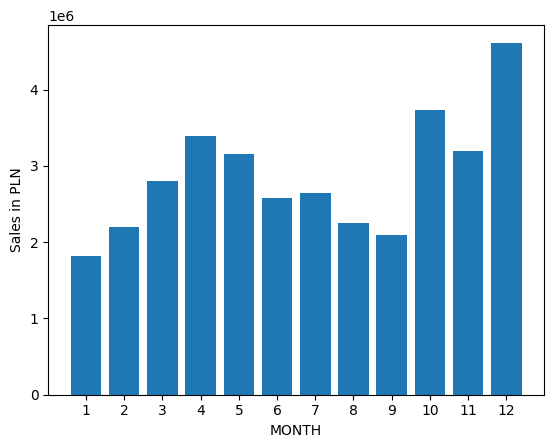

In [34]:
import matplotlib.pyplot as plt
MONTH = range(1,13)

results = data.groupby('MONTH')['Sales'].sum().reset_index()
plt.bar(results['MONTH'], results['Sales'])
plt.xticks(MONTH)
plt.ylabel("Sales in PLN")
plt.xlabel("MONTH")
plt.show()

# Lets create another column from Purchasee_Address and call it City

In [35]:
data.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address,MONTH,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [36]:
def get_city(address):
    return address.split(',')[1].strip()  # Added .strip() to remove whitespace

def get_state(address):
    return address.split(',')[2].split(' ')[1].strip()  # Added .strip()

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})" if pd.notna(x) else None)

In [37]:
data.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address,MONTH,Sales,City
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [38]:
data.groupby('City').sum(numeric_only=True)

,Order_ID,Quantity_Ordered,Price_Each,MONTH,Sales
City,,,,,
Atlanta (GA),3.423838e+09,16602.0,2779908.20,104794,2795498.58
Austin (TX),2.280982e+09,11153.0,1809873.61,69829,1819581.75
Boston (MA),4.598265e+09,22528.0,3637409.77,141112,3661642.01
Dallas (TX),3.415644e+09,16730.0,2752627.82,104620,2767975.40
Los Angeles (CA),6.811085e+09,33289.0,5421435.23,208325,5452570.80
New York City (NY),5.736334e+09,27932.0,4635370.83,175741,4664317.43
Portland (ME),5.632663e+08,2750.0,447189.25,17144,449758.27
Portland (OR),2.305595e+09,11303.0,1860558.22,70621,1870732.34
San Francisco (CA),1.030444e+10,50239.0,8211461.74,315520,8262203.91


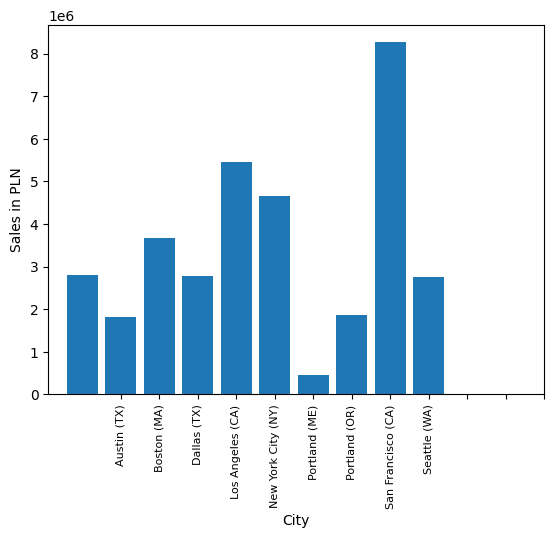

In [39]:
import matplotlib.pyplot as plt
City = range(1,13)

results = data.groupby('City')['Sales'].sum().reset_index()
plt.bar(results['City'], results['Sales'])
plt.xticks(City, rotation='vertical', size=8)
plt.ylabel("Sales in PLN")
plt.xlabel("City")
plt.show()

# Question 2: What time should we display advertisements to maximize likelihood of customer's buying product?

In [40]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address,MONTH,Sales,City
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [41]:
data['Hour of Day'] = data['Order_Date'].dt.hour
data['Minute'] = data['Order_Date'].dt.minute
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address,MONTH,Sales,City,Hour of Day,Minute
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


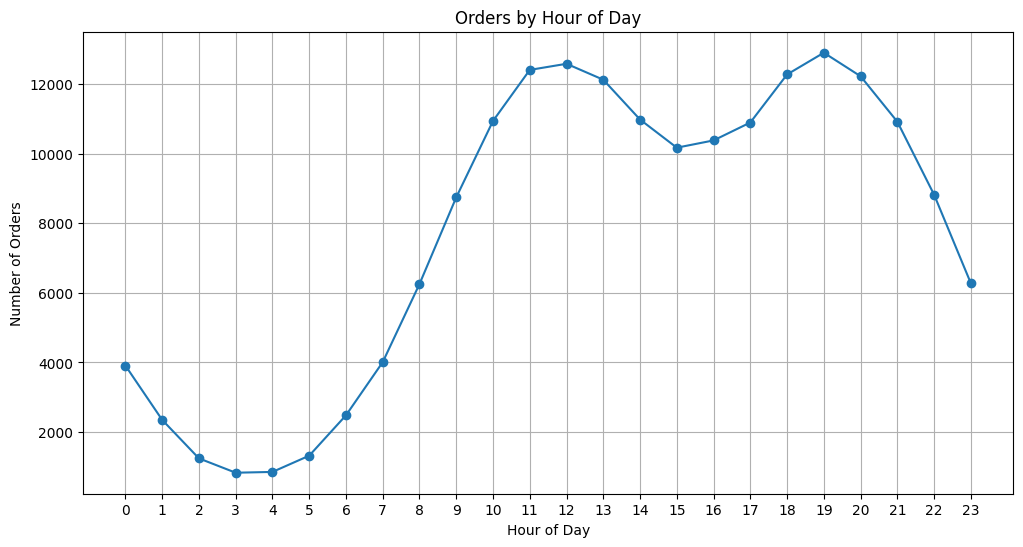

In [42]:
hourly_data = data.groupby('Hour of Day').size()  # or .count() on a specific column

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data.values, marker='o')
plt.xticks(hourly_data.index)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour of Day')
plt.grid()
plt.show()

# Question 3: What products are most often sold together?

In [43]:
df = data[data['Order_ID'].duplicated(keep=False)].copy()
df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order_ID', 'Grouped']].drop_duplicates()

df.head()

,Order_ID,Grouped
3,176560.0,"Google Phone,Wired Headphones"
18,176574.0,"Google Phone,USB-C Charging Cable"
30,176585.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586.0,"AAA Batteries (4-pack),Google Phone"
119,176672.0,"Lightning Charging Cable,USB-C Charging Cable"


In [44]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 4: What Product sold the most? and why do you think it sold the most?

In [45]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase Address,MONTH,Sales,City,Hour of Day,Minute
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  float64       
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  float64       
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   MONTH             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour of Day       185950 non-null  int32         
 10  Minute            185950 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(3), object(3)
memory usage: 14.9+ MB


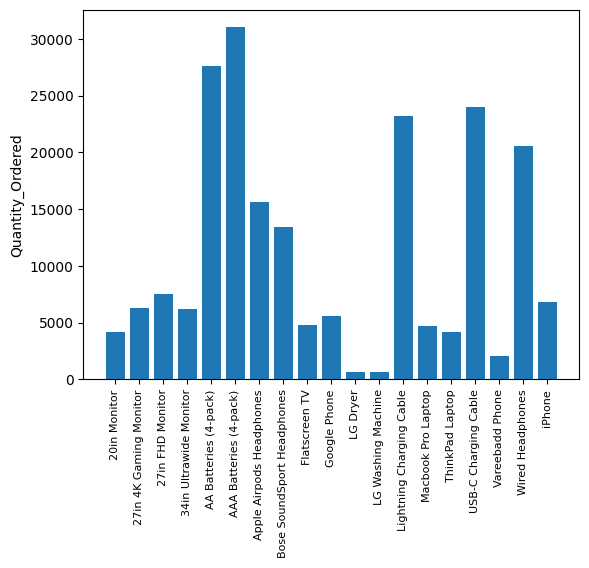

In [49]:
product_group = data.groupby("Product")
Quantity_ordered = product_group.sum(numeric_only=True)['Quantity_Ordered']

Products = [product for product, df in product_group]

plt.bar(Products, Quantity_ordered)
plt.ylabel('Quantity_Ordered')
plt.xticks(Products, rotation='vertical', size=8)
plt.show()


In [54]:
prices = data.groupby("Product").mean(numeric_only=True)["Price_Each"]

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price_Each, dtype: float64


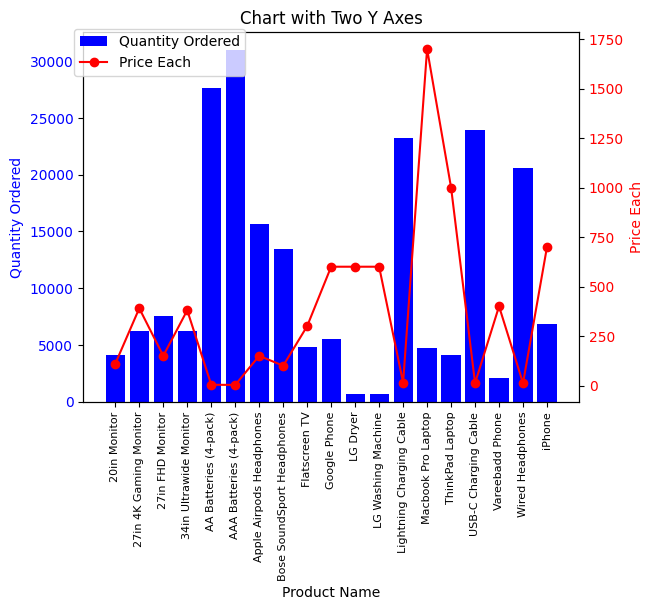

In [75]:
# Grouping by 'Product' and summing 'Quantity_Ordered'
product_group = data.groupby("Product")
Quantity_Ordered = product_group.sum(numeric_only=True)['Quantity_Ordered']
Price_Each = product_group.mean(numeric_only=True)['Price_Each']

# Extracting product names
Products = [product for product in product_group.groups.keys()]

# Creating the plot
fig, ax1 = plt.subplots()

# Plotting the first dataset (Quantity Ordered)
ax1.bar(Products, Quantity_Ordered, color='b', label='Quantity Ordered')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Setting x-ticks and labels
ax1.set_xticks(Products)  # Set the positions of the ticks
ax1.set_xticklabels(Products, rotation='vertical', size=8)  # Set the labels

# Creating a second y-axis for Price
ax2 = ax1.twinx()
ax2.plot(Products, Price_Each, color='r', label='Price Each', marker='o')
ax2.set_ylabel('Price Each', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Chart with Two Y Axes')
plt.show()
